# Time Series with Electricity Prices

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns
import plotly

import pmdarima as pm
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

from scipy.stats import norm
from sklearn.metrics import mean_squared_error 

from datetime import datetime
from pytz import timezone
import pytz

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
df = pd.read_excel('Electricity_prices3.xlsm')
print(len(df))
df.head()

28464


,Date_time,Dollars_per_mwh
0,2017-03-26 00:00:00,9.75524
1,2017-03-26 01:00:00,5.19205
2,2017-03-26 02:00:00,4.14945
3,2017-03-26 03:00:00,7.98666
4,2017-03-26 04:00:00,8.66210


In [7]:
df['Date_time'] = pd.to_datetime(df['Date_time'])  
df.set_index('Date_time', inplace=True)

In [8]:
df.head()

,Dollars_per_mwh
Date_time,
2017-03-26 00:00:00,9.75524
2017-03-26 01:00:00,5.19205
2017-03-26 02:00:00,4.14945
2017-03-26 03:00:00,7.98666
2017-03-26 04:00:00,8.66210


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28464 entries, 2017-03-26 00:00:00 to 2020-06-23 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dollars_per_mwh  28464 non-null  float64
dtypes: float64(1)
memory usage: 444.8 KB


## Visualizing the Electricity Price data - Hourly prices from 3/26/2017 - 6/23/2020

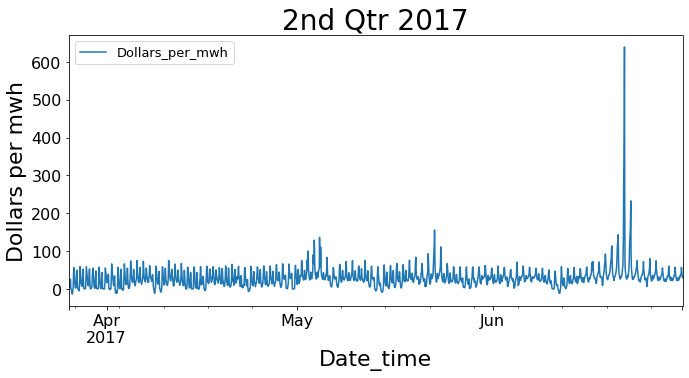

In [10]:
df['2017-03-26 00:00:00':'2017-06-30 23:00:00'].plot(figsize = (11,5))  #plot of 2017 Q2

plt.legend(loc='best', fontsize=13)
plt.title('2nd Qtr 2017', fontsize=28)
plt.xlabel('Date_time', fontsize=22)
plt.ylabel('Dollars per mwh', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.show()

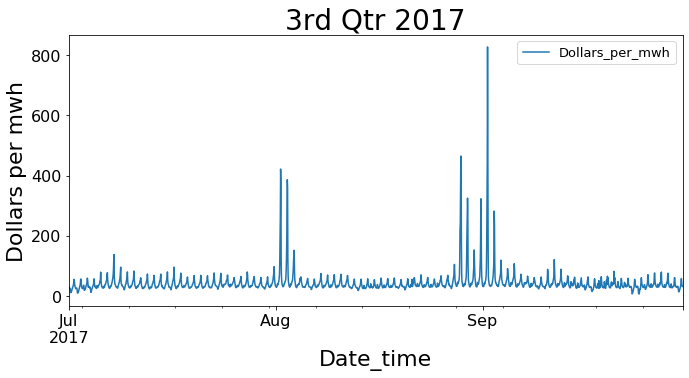

In [11]:
df['2017-07-01 00:00:00':'2017-09-30 23:00:00'].plot(figsize = (11,5))  #plot of 2017 Q3

plt.legend(loc='best', fontsize=13)
plt.title('3rd Qtr 2017', fontsize=28)
plt.xlabel('Date_time', fontsize=22)
plt.ylabel('Dollars per mwh', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.show()

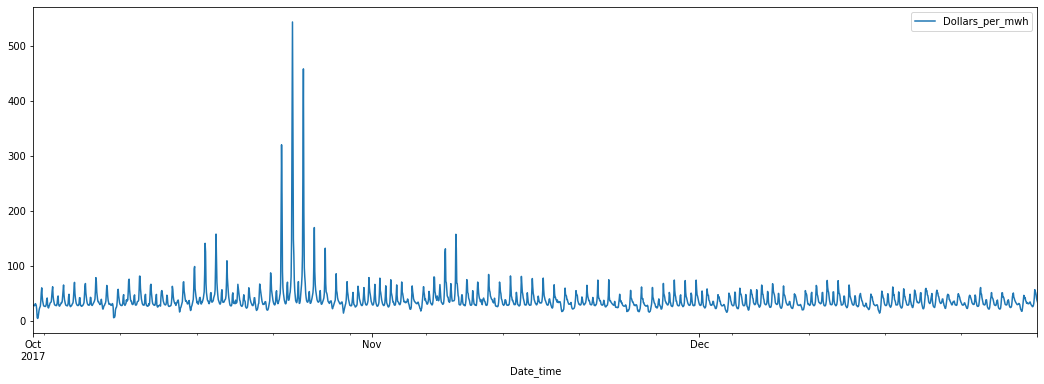

In [12]:
df['2017-10-01 00:00:00':'2017-12-31 23:00:00'].plot(figsize = (18,6))  #plot of 2017 Q4

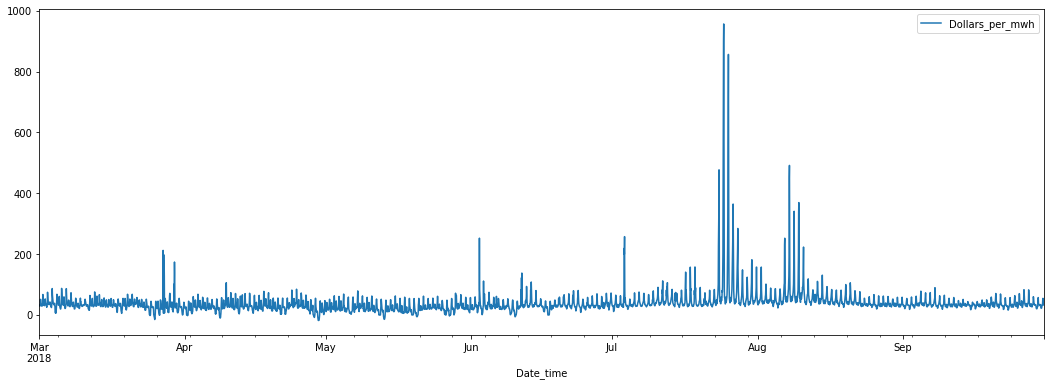

In [13]:
df['2018-03-01 00:00:00':'2018-09-30 23:00:00'].plot(figsize = (18,6))   #plot of 2018 Q2 + Q3

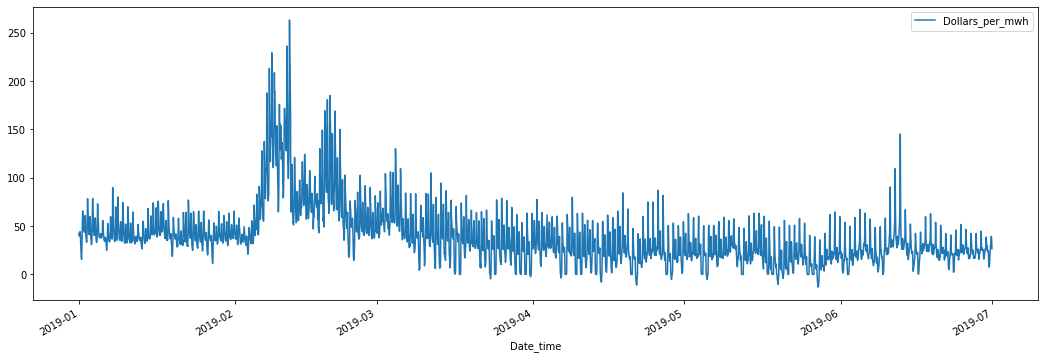

In [14]:
df['2019-01-01 00:00:00':'2019-06-30 23:00:00'].plot(figsize = (18,6))   #plot of 2019 Q1 + Q2

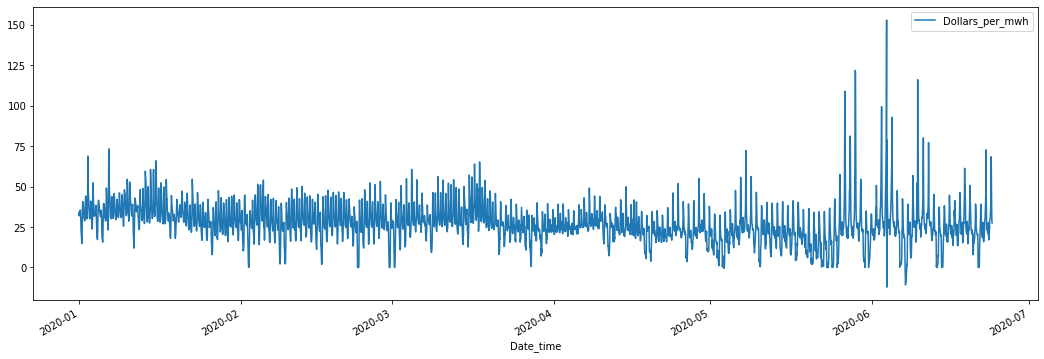

In [15]:
df['2020-01-01 00:00:00':'2020-06-23 23:00:00'].plot(figsize = (18,6))   #plot of 2020 Q1 + Q2

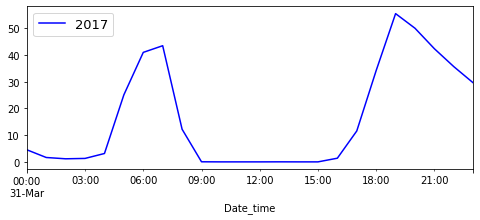

In [16]:
df['2017-03-31 00:00:00':'2017-03-31 23:00:00'].plot(figsize = (8,3), color='blue')  
plt.legend(['2017'], loc='best', fontsize=13)
plt.tick_params(axis='both', labelsize=10)           

 #next 4 visualizations
 #visualizing 3/31 from each year, this is to compare to the first slide of the presentation, the 'duck curve'

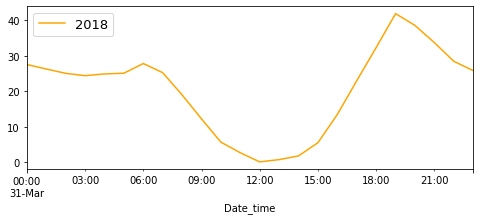

In [17]:
df['2018-03-31 00:00:00':'2018-03-31 23:00:00'].plot(figsize = (8,3), color='orange')
plt.legend(['2018'], loc='best', fontsize=13)
plt.tick_params(axis='both', labelsize=10)

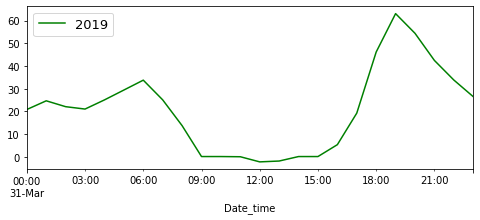

In [18]:
df['2019-03-31 00:00:00':'2019-03-31 23:00:00'].plot(figsize = (8,3), color='green')
plt.legend(['2019'], loc='best', fontsize=13)
plt.tick_params(axis='both', labelsize=10)

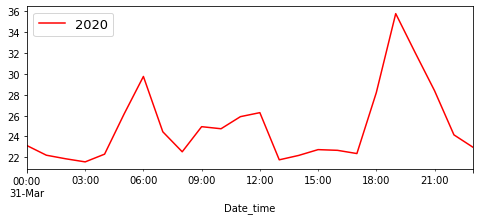

In [19]:
df['2020-03-31 00:00:00':'2020-03-31 23:00:00'].plot(figsize = (8,3), color='red')
plt.legend(['2020'], loc='best', fontsize=13)
plt.tick_params(axis='both', labelsize=10)

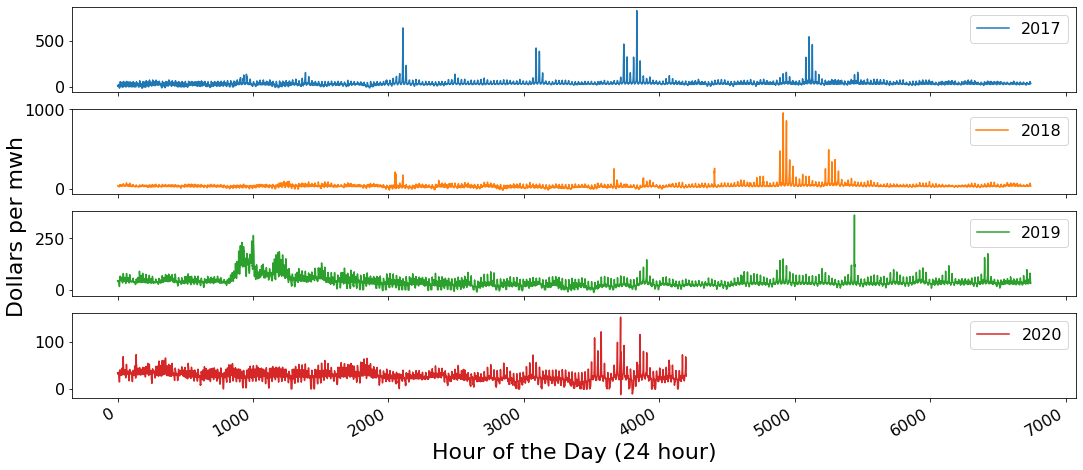

In [78]:
# Use pandas grouper to group values using annual frequency                     #Are there any yearly patterns? no
year_groups = df.groupby(pd.Grouper(freq ='A'))

# Create a new DataFrame and store yearly values in columns 
df_annual = pd.DataFrame()

for yr, group in year_groups:
    df_annual[yr.year] = pd.Series(group.values.ravel())      #needed to add pd.Series to fix error
    
# Plot the yearly groups as subplots
import pylab as plot
params = {'legend.fontsize': 16,
          'legend.handlelength': 2}
plot.rcParams.update(params)


axes = df_annual.plot(figsize = (18,8), subplots=True, legend=True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=16)
plt.xlabel('Hour of the Day (24 hour)', fontsize=22)
plt.gcf().text(0.075,0.5,"Dollars per mwh", va="center", rotation='vertical', fontsize=22)
plt.show()
plt.rc('ytick',labelsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1219054c0>,
      dtype=object)

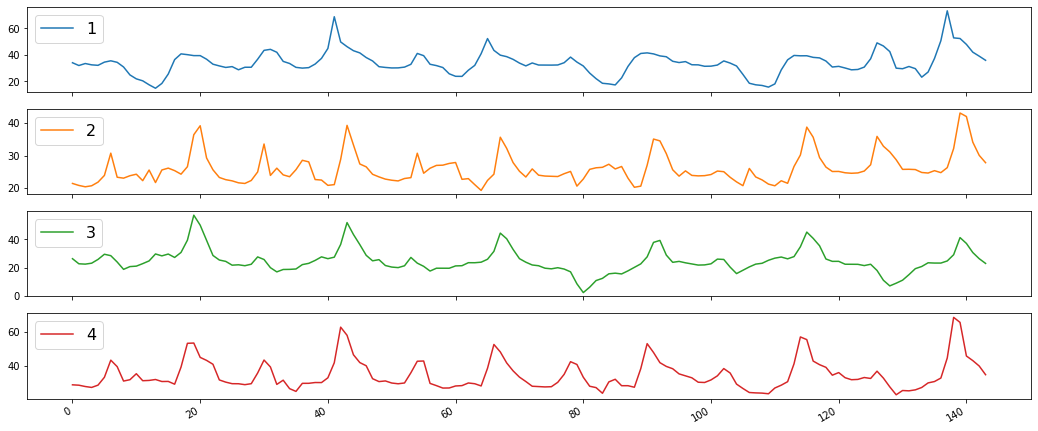

In [21]:
# Use pandas grouper to group values using quaterly frequency                     #Are there any quarterly patterns?
qtr_groups = df.groupby(pd.Grouper(freq ='Q'))

# Create a new DataFrame and store quarterly values in columns 
df_qtr = pd.DataFrame()

for qtr, group in qtr_groups:
    df_qtr[qtr.quarter] = pd.Series(group.values.ravel())      #needed to add pd.Series to fix error
    
# Plot the quarterly groups as subplots
df_qtr.plot(figsize = (18,8), subplots=True, legend=True)

In [22]:
roll_mean = df.rolling(window=8, center=False).mean()  
roll_std = df.rolling(window=8, center=False).std()

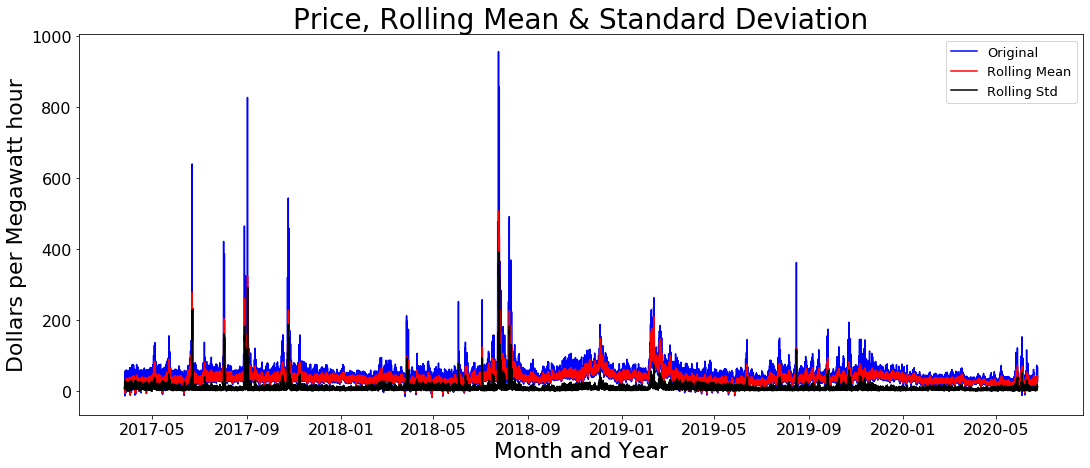

In [23]:
fig = plt.figure(figsize=(18,7))              
plt.plot(df, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best', fontsize=13)
plt.title('Price, Rolling Mean & Standard Deviation', fontsize=28)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Month and Year', fontsize=22)
plt.ylabel('Dollars per Megawatt hour', fontsize=22)
plt.show(block=False)

## Time Series Decomposition

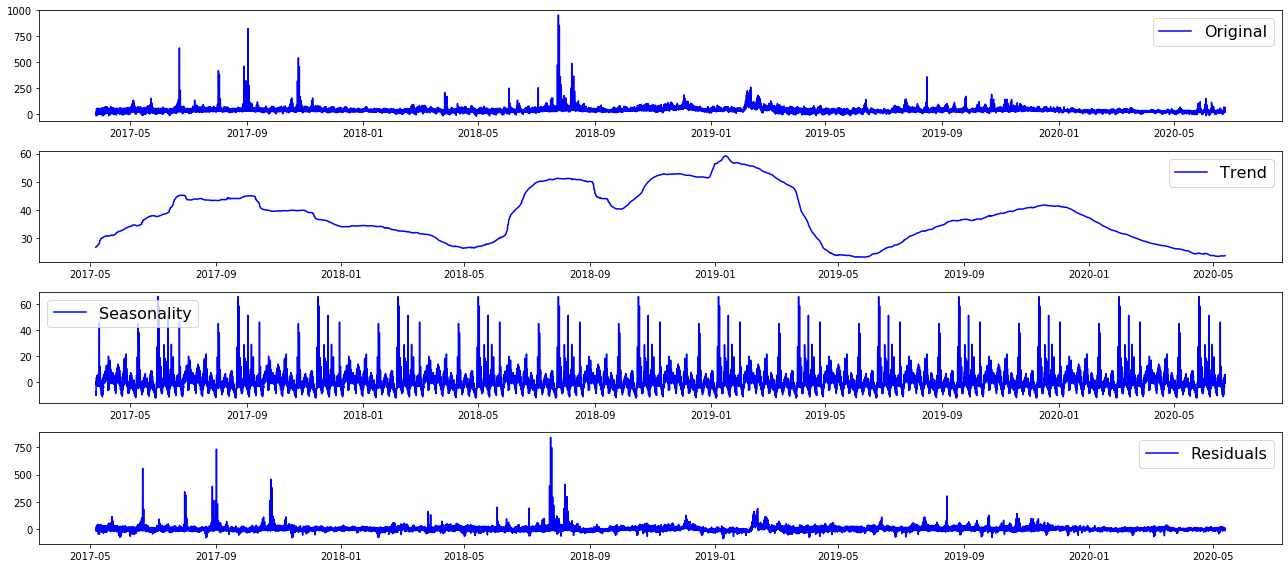

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period=2018)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(18,8))
plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

I expected to see some seasonality, but there is none in the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1267b8a00>]],
      dtype=object)

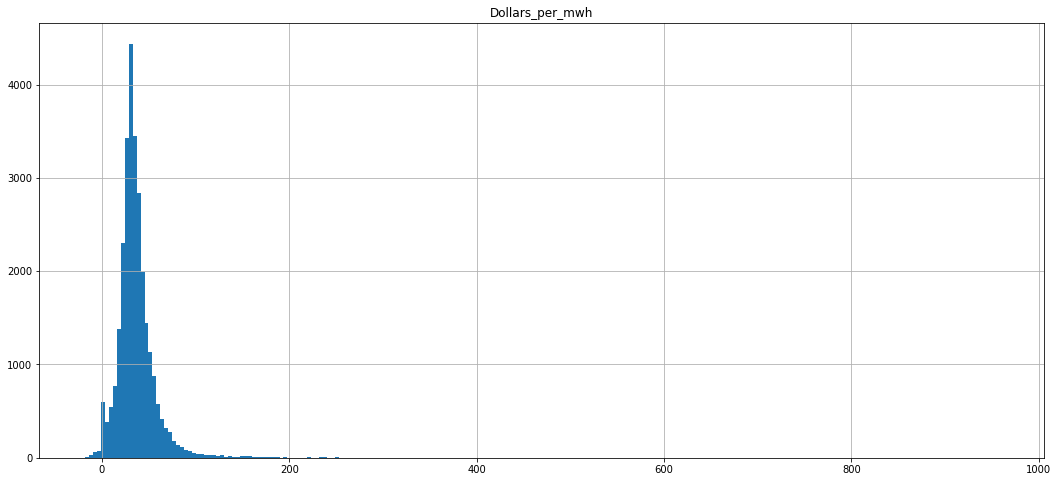

In [25]:
df.hist(figsize=(18,8), bins=230)

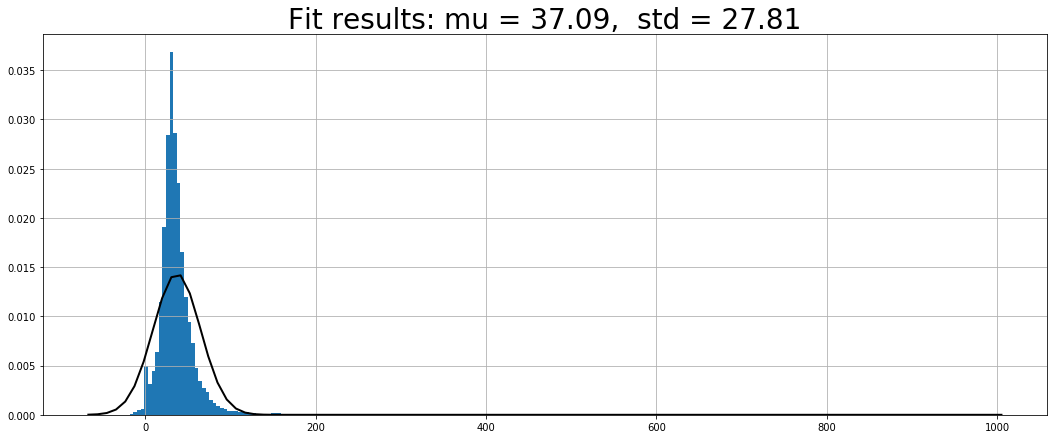

In [26]:
df.hist(figsize=(18,7), bins=230, density=True)
mu, std = norm.fit(df)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize=28)

plt.show()

This curve has more kurtosis than the normal distribution. It is more concentrated about the mean. The curve is Leptokurtic

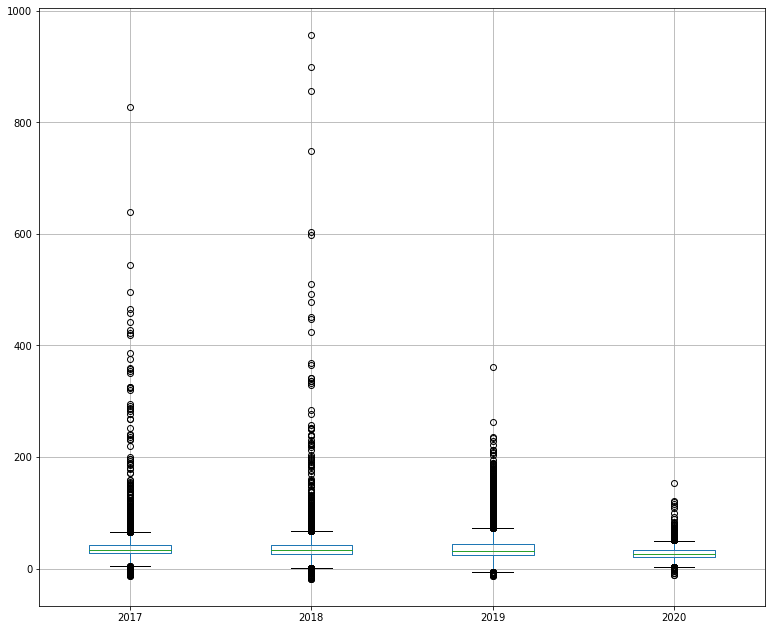

In [27]:
df_annual.boxplot(figsize = (13,11))

2017 and 2020 are not full years, so cannot interpret

In [28]:
print('2017 mean price', df['2017'].mean())      #2017 and 2020 are not full years so not comparable
print('2018 mean price', df['2018'].mean()) 
print('2019 mean price', df['2019'].mean())     
print('2020 mean price', df['2020'].mean()) 

2017 mean price Dollars_per_mwh    37.161204
dtype: float64
2018 mean price Dollars_per_mwh    40.719607
dtype: float64
2019 mean price Dollars_per_mwh    38.250562
dtype: float64
2020 mean price Dollars_per_mwh    26.969716
dtype: float64


## Making the Time Series Stationary

In [29]:
from statsmodels.tsa.stattools import adfuller                           #The Dickey-Fuller Test

dftest = adfuller(df)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -1.118227e+01
p-value                        2.484068e-20
#Lags Used                     5.000000e+01
Number of Observations Used    2.841300e+04
Critical Value (1%)           -3.430580e+00
Critical Value (5%)           -2.861642e+00
Critical Value (10%)          -2.566824e+00
dtype: float64


p-value is less than .05, so data is already stationary!

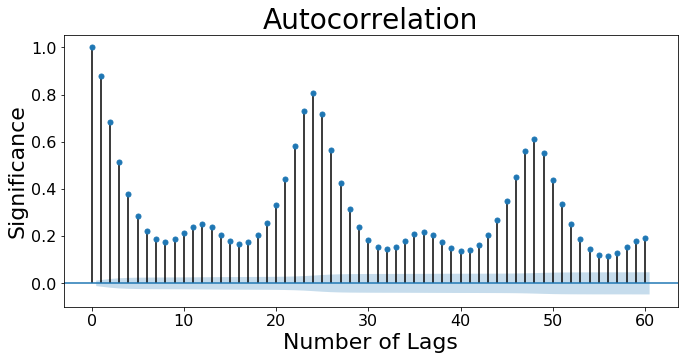

In [30]:
from statsmodels.graphics.tsaplots import plot_acf  #high autocorrelation, can enter q lags significant in a MA model
from matplotlib.pylab import rcParams               #also high autocorrelation on the 24th lag

rcParams['figure.figsize'] = 11, 5   
plot_acf(df, lags=60)
plt.title('Autocorrelation', fontsize=28)
plt.xlabel('Number of Lags', fontsize=22)
plt.ylabel('Significance', fontsize=22)
plt.tick_params(axis='both', labelsize=16)

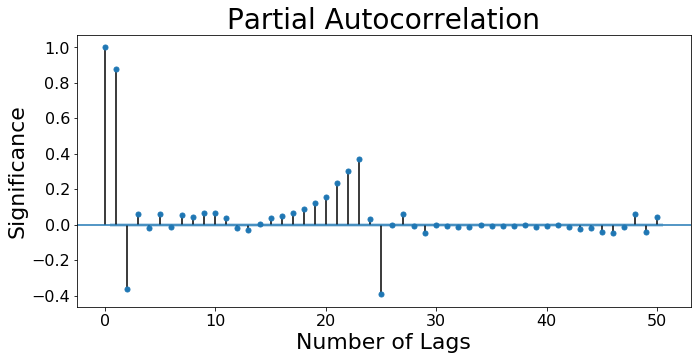

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf #High positive partial autocorrelation on the 1st and 23rd lag
from matplotlib.pylab import rcParams             #High negative partial autocorrelation on the 2nd and 25th lag

rcParams['figure.figsize'] = 11, 5

plot_pacf(df, lags=50)
plt.title('Partial Autocorrelation', fontsize=28)
plt.xlabel('Number of Lags', fontsize=22)
plt.ylabel('Significance', fontsize=22)
plt.tick_params(axis='both', labelsize=16)

## Persistence Algorithm (Naive model)

In [32]:
# Create lagged dataset                               
df_values = pd.DataFrame(df.values)
df_pers = pd.concat([df_values.shift(1), df_values], axis=1)
df_pers.columns = ['t-1', 't+1']
df_pers.head(5)

#The 'Persistence Algorithm' section uses an article by Jason Brownlee Phd
#https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

,t-1,t+1
0,NaN,9.75524
1,9.75524,5.19205
2,5.19205,4.14945
3,4.14945,7.98666
4,7.98666,8.66210


dropped row zero

In [33]:
# train_per = df_pers[:int(0.9*(len(df_pers)))]        #There's no training for the Persistence Algorithm, but we need 
# valid_per = df_pers[int(0.9*(len(df_pers))):]                #the validation set to predict on

X = df_pers.values
train_size = int(len(X) * 0.9)
train_per, valid_per = X[:train_size], X[train_size:]

train_per_x, train_per_y = train_per[:,0], train_per[:,1]
valid_per_x, valid_per_y = valid_per[:,0], valid_per[:,1]

In [34]:
def model_persistence(x):
    return x

df_pers_pred = []
for x in valid_per_x:
    yhat = model_persistence(x)
    df_pers_pred.append(yhat)
test_score_pers = np.sqrt(mean_squared_error(valid_per_y, df_pers_pred))
print('Test RMSE: %.3f' % test_score_pers)

Test RMSE: 7.002


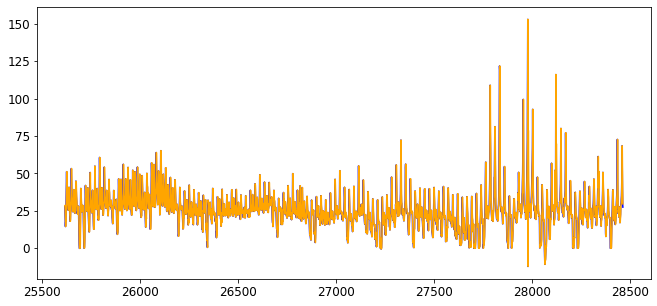

In [35]:
#pyplot.plot(train_per_y)                           
fig = plt.figure(figsize=(11,5))                    
pyplot.plot([None for i in train_per_y] + [x for x in valid_per_y], color='blue')
pyplot.plot([None for i in train_per_y] + [x for x in df_pers_pred],color='orange')
plt.tick_params(axis='both', labelsize=12)
pyplot.show()

Predictions vs actuals for whole validation set. See graph below for easier visualization

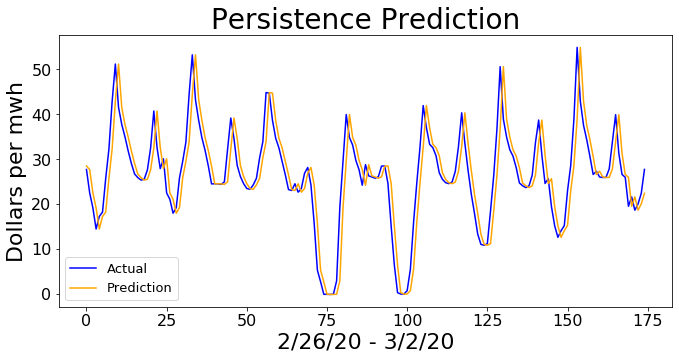

In [36]:
fig = plt.figure(figsize=(11,5))               #Predictions vs actuals for 1st week of validation 2/26/20 - 3/2/20
pyplot.plot(valid_per_y[0:175], color='blue', label='Actual')         
pyplot.plot(df_pers_pred[0:175],color='orange', label='Prediction')
plt.tick_params(axis='both', labelsize=12)

plt.legend(loc='best', fontsize=13)
plt.title('Persistence Prediction', fontsize=28)
plt.xlabel('2/26/20 - 3/2/20', fontsize=22)
plt.ylabel('Dollars per mwh', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
#plt.xticks(rotation=25)


pyplot.show()

This is hard to visualize but the prediction is t-1.
I wish Jason Brownlee didn't strip the datetime out of the dataframe. This can be a stretch goal to recreate with datetime.

## ARIMA model

In [37]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [38]:
train = df[:int(0.9*(len(df)))]        #split into train and validation set
valid = df[int(0.9*(len(df))):]

In [39]:
mod_arma_ar = ARMA(train, order=(1,1))
res_arma_ar = mod_arma_ar.fit()
print(res_arma_ar.summary())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:        Dollars_per_mwh   No. Observations:                25617
Model:                     ARMA(1, 1)   Log Likelihood             -101871.335
Method:                       css-mle   S.D. of innovations             12.907
Date:                Mon, 06 Jul 2020   AIC                         203750.670
Time:                        22:50:22   BIC                         203783.274
Sample:                             0   HQIC                        203761.211
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.4087      0.552     69.558      0.000      37.326      39.491
ar.L1.Dollars_per_mwh     0.7928      0.004    190.252      0.000       0.785       0.801
ma.L1.Do

In [44]:
forecast_master_ar = res_arma_ar.forecast(len(valid))
forecast_ar = pd.DataFrame(forecast_master_ar[0],index = valid.index,columns=['Prediction'])
forecast_ar.head()

,Prediction
Date_time,
2020-02-26 09:00:00,29.591299
2020-02-26 10:00:00,31.418566
2020-02-26 11:00:00,32.867159
2020-02-26 12:00:00,34.015554
2020-02-26 13:00:00,34.925961


In [43]:
from sklearn.metrics import mean_squared_error                               #RMSE
error_ar = np.sqrt(mean_squared_error((valid),forecast_ar))
error_ar

18.01264983427828

In [45]:
mod_arma_ar1 = ARMA(train, order=(5,5))
res_arma_ar1 = mod_arma_ar1.fit()
print(res_arma_ar1.summary())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:        Dollars_per_mwh   No. Observations:                25617
Model:                     ARMA(5, 5)   Log Likelihood             -100758.865
Method:                       css-mle   S.D. of innovations             12.357
Date:                Mon, 06 Jul 2020   AIC                         201541.730
Time:                        22:59:14   BIC                         201639.542
Sample:                             0   HQIC                        201573.352
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.3856      0.515     74.601      0.000      37.377      39.394
ar.L1.Dollars_per_mwh     1.6763      0.011    150.231      0.000       1.654       1.698
ar.L2.Do

In [46]:
forecast_master_ar1 = res_arma_ar1.forecast(len(valid))
forecast_ar1 = pd.DataFrame(forecast_master_ar1[0],index = valid.index,columns=['Prediction'])
forecast_ar1.head()

,Prediction
Date_time,
2020-02-26 09:00:00,27.309689
2020-02-26 10:00:00,25.413924
2020-02-26 11:00:00,23.845341
2020-02-26 12:00:00,23.447304
2020-02-26 13:00:00,24.640156


In [47]:
error_ar1 = np.sqrt(mean_squared_error((valid),forecast_ar1))
error_ar1

17.552815585921206

### Auto-ARIMA

In [258]:
import pmdarima as pm
model_auto = pm.auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_fit = model_auto.fit(train)
print(model_auto_fit.summary())                #like grid search for ARIMA

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=202723.946, BIC=202772.852, Time=21.965 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=209170.069, BIC=209186.371, Time=0.480 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=207000.928, BIC=207025.381, Time=0.564 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=206410.258, BIC=206434.711, Time=3.278 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=209168.069, BIC=209176.220, Time=0.256 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=203649.870, BIC=203690.625, Time=23.995 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=202726.579, BIC=202767.333, Time=13.123 seconds
Fit ARIMA(3,1,2)x(0,0,0,0) [intercept=True]; AIC=202589.303, BIC=202646.360, Time=20.675 seconds
Fit ARIMA(3,1,1)x(0,0,0,0)

In [259]:
forecast_auto = model_auto_fit.predict(n_periods=len(valid)) #predicting 2/26/20 - 6/23/20 hourly prices
forecast_auto = pd.DataFrame(forecast_auto, index = valid.index,columns=['Prediction'])
forecast_auto.head()

,Prediction
Date_time,
2020-02-26 09:00:00,27.108327
2020-02-26 10:00:00,27.157278
2020-02-26 11:00:00,29.002978
2020-02-26 12:00:00,29.151396
2020-02-26 13:00:00,28.061594


(array([737485., 737499., 737516., 737530., 737546., 737560., 737577.,
        737591.]),
 <a list of 8 Text xticklabel objects>)

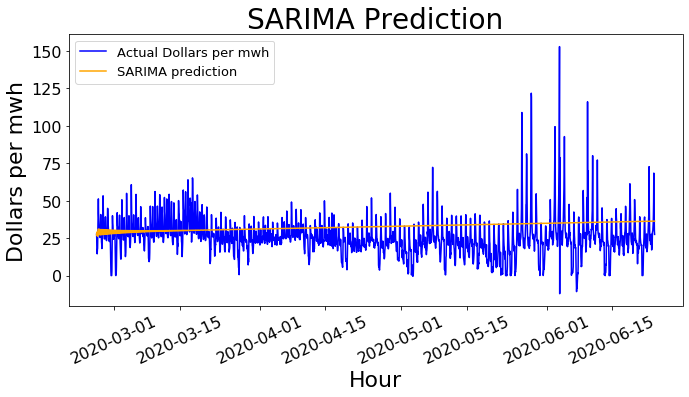

In [378]:
    fig = plt.figure(figsize=(11,5))                               #Zoomed in 2/26/20-6/23/20 to see predictions
    plt.plot(valid, color='blue', label='Actual Dollars per mwh')
    plt.plot(forecast_auto, color='orange', label='SARIMA prediction')

    plt.legend(loc='best', fontsize=13)
    plt.title('SARIMA Prediction', fontsize=28)
    plt.xlabel('Hour', fontsize=22)
    plt.ylabel('Dollars per mwh', fontsize=22)
    plt.tick_params(axis='both', labelsize=16)
    plt.xticks(rotation=25)

This prediction is difficult to interpert. The prediction does not retain the daily pattern. There is an 8 hour cycle(shown in graph below) instead of a 24-hour cycle. The prediction also has an upward trend with decreasing volatility, which is not present in the data

In [264]:
error_auto = np.sqrt(mean_squared_error(valid,forecast_auto))      #RMSE
error_auto

14.70282105477285

This RMSE is more than double the naive model RMSE(7). The baseline model beats the ARIMA model

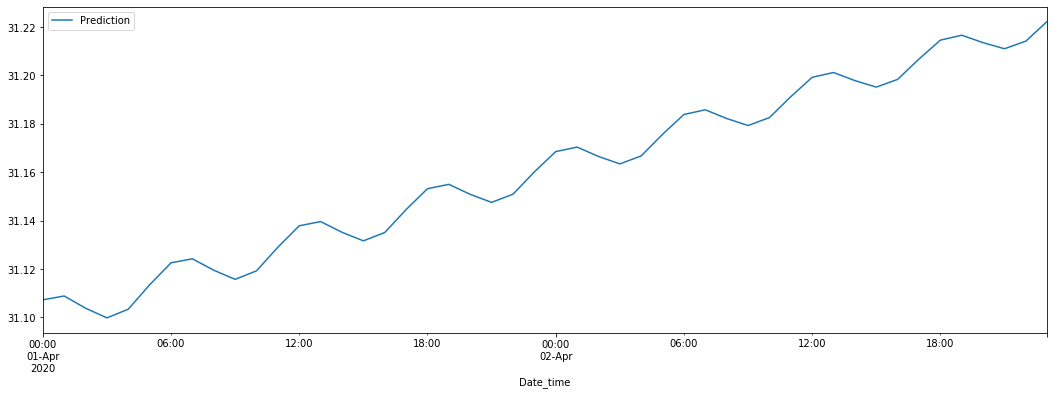

In [266]:
forecast_auto['2020-04-01 00:00:00':'2020-04-02 23:00:00'].plot()

## FB Prophet model

In [307]:
from fbprophet import Prophet

In [308]:
df.head()

,Dollars_per_mwh
Date_time,
2017-03-26 00:00:00,9.75524
2017-03-26 01:00:00,5.19205
2017-03-26 02:00:00,4.14945
2017-03-26 03:00:00,7.98666
2017-03-26 04:00:00,8.66210


In [309]:
fb = df.copy()
fb.head()

,Dollars_per_mwh
Date_time,
2017-03-26 00:00:00,9.75524
2017-03-26 01:00:00,5.19205
2017-03-26 02:00:00,4.14945
2017-03-26 03:00:00,7.98666
2017-03-26 04:00:00,8.66210


In [310]:
fb.reset_index(level=0, inplace=True)   #FB Prophet requires this format
fb.columns = ['ds', 'y']
fb.head()

,ds,y
0,2017-03-26 00:00:00,9.75524
1,2017-03-26 01:00:00,5.19205
2,2017-03-26 02:00:00,4.14945
3,2017-03-26 03:00:00,7.98666
4,2017-03-26 04:00:00,8.66210


In [311]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28464 entries, 0 to 28463
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      28464 non-null  datetime64[ns]
 1   y       28464 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 444.9 KB


In [312]:
fb_train = fb[:int(0.9*(len(fb)))]        #split into train and validation set
fb_valid = fb[int(0.9*(len(fb))):]

In [313]:
fb_model = Prophet(interval_width=0.95)  
FB = fb_model.fit(fb_train) 

In [314]:
validation_dates = fb_model.make_future_dataframe(periods=(len(fb_valid)), freq='H') 
validation_dates.head()               #FB Prophet has a method to create a new dataframe for the predictions

,ds
0,2017-03-26 00:00:00
1,2017-03-26 01:00:00
2,2017-03-26 02:00:00
3,2017-03-26 03:00:00
4,2017-03-26 04:00:00


In [315]:
validation_dates.tail() 

,ds
28459,2020-06-23 19:00:00
28460,2020-06-23 20:00:00
28461,2020-06-23 21:00:00
28462,2020-06-23 22:00:00
28463,2020-06-23 23:00:00


In [316]:
fb_pred = fb_model.predict(validation_dates)   #FB Prophet making predictions

In [318]:
fb2 =fb_pred[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]
fb2.head()

,ds,yhat_lower,yhat_upper,yhat
0,2017-03-26 00:00:00,-34.828393,50.686151,8.275447
1,2017-03-26 01:00:00,-36.811631,52.102561,6.393117
2,2017-03-26 02:00:00,-39.349563,45.517083,4.080306
3,2017-03-26 03:00:00,-41.178322,46.439241,3.626979
4,2017-03-26 04:00:00,-37.381917,51.328421,6.869985


In [319]:
fb2.tail()

,ds,yhat_lower,yhat_upper,yhat
28459,2020-06-23 19:00:00,-87.392522,203.136801,53.971204
28460,2020-06-23 20:00:00,-88.929374,190.415782,46.030252
28461,2020-06-23 21:00:00,-104.275508,186.689812,34.516855
28462,2020-06-23 22:00:00,-117.263080,177.396972,25.378631
28463,2020-06-23 23:00:00,-121.371681,176.876903,20.910821


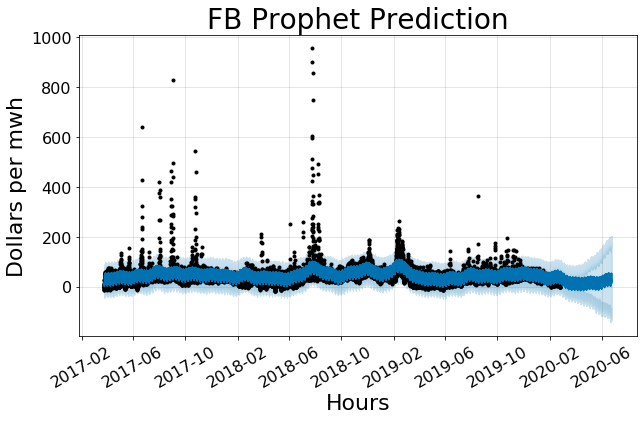

In [324]:
fb_model.plot(fb2, xlabel= '', ylabel= '', figsize=(8.5, 4.75))

plt.xlabel('Hours', fontsize=22)                   #shaded area represents 95% confidence interval
plt.title('FB Prophet Prediction', fontsize=28)
plt.ylabel('Dollars per mwh', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=30)
plt.show()

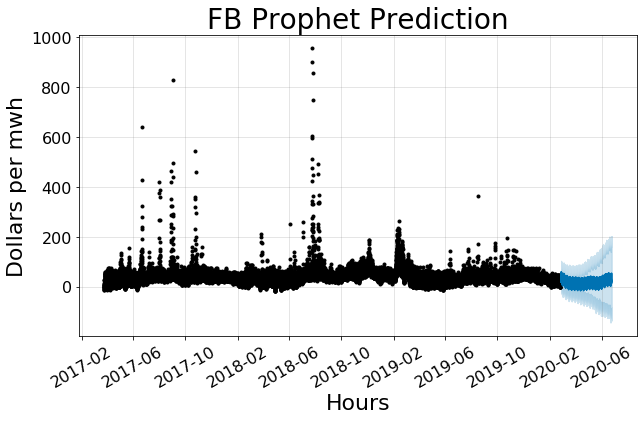

In [325]:
fb_model.plot(fb2[int(0.9*(len(fb2))):], xlabel= '', ylabel= '', figsize=(8.5, 4.75))

plt.xlabel('Hours', fontsize=22)                   #shaded area represents 95% confidence interval
plt.title('FB Prophet Prediction', fontsize=28)
plt.ylabel('Dollars per mwh', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=30)
plt.show()

This visualization is hard to see. I will recreate a graph with only the validation set below

In [339]:
valid.head()

,Dollars_per_mwh
Date_time,
2020-02-26 09:00:00,27.73832
2020-02-26 10:00:00,22.54115
2020-02-26 11:00:00,19.17899
2020-02-26 12:00:00,14.49777
2020-02-26 13:00:00,17.28031


In [360]:
fb3 = fb2.copy()

In [361]:
fb3.drop(['yhat_lower', 'yhat_upper'], axis=1, inplace=True)   #dropping unneeded columns and resetting index
fb3.set_index('ds', inplace=True)

In [362]:
fb3.head()

,yhat
ds,
2017-03-26 00:00:00,8.275447
2017-03-26 01:00:00,6.393117
2017-03-26 02:00:00,4.080306
2017-03-26 03:00:00,3.626979
2017-03-26 04:00:00,6.869985


In [373]:
fb3.drop(fb3.index[0:1], inplace=True)  #dropping rows to make the lenght of the fb dataframe match the length
fb3.head()                                         #of the valid dataframe

,yhat
ds,
2020-02-26 09:00:00,20.701761
2020-02-26 10:00:00,18.211157
2020-02-26 11:00:00,19.371667
2020-02-26 12:00:00,21.298411
2020-02-26 13:00:00,21.794205


(array([737485., 737499., 737516., 737530., 737546., 737560., 737577.,
        737591.]),
 <a list of 8 Text xticklabel objects>)

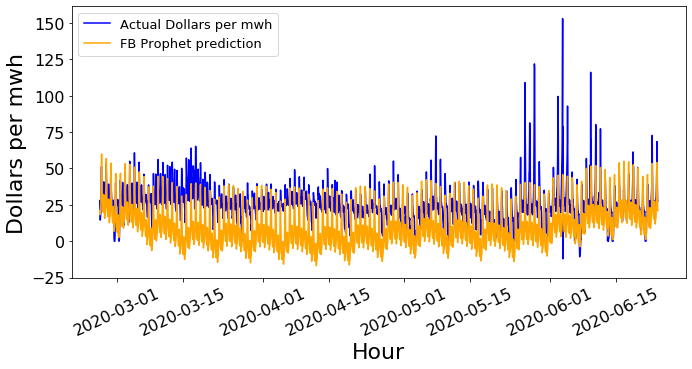

In [490]:
fig = plt.figure(figsize=(11,5))                               #Zoomed in 2/26/20-6/23/20 from above graph
plt.plot(valid, color='blue', label='Actual Dollars per mwh')
plt.plot(fb3, color='orange', label='FB Prophet prediction')

plt.legend(loc='best', fontsize=13)
#plt.title('FB Prophet Prediction', fontsize=28)
plt.xlabel('Hour', fontsize=22)
plt.ylabel('Dollars per mwh', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=25)

In [375]:
error_fb = np.sqrt(mean_squared_error(valid,fb3))      #RMSE
error_fb

19.274019775538996

FB Prophet has the highest RMSE of over 19.27

Model RMSE Summary
1. Persistence Algorithm &emsp;&emsp; 7.002  &emsp;&emsp;  baseline model outperforms!
2. SARIMA  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &ensp;&ensp;&ensp; &nbsp;&nbsp;     14.703
3. FB Prophet   &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  &ensp;       19.274